• Sinusoid Dataset: This is an artificial dataset created by randomly sampling the function y = f(x) = 7.5sin(2.25πx). You have a total of 100 samples of the input feature x and the corresponding noise corrupted output/function values y. In addition to this you are also given a validation set that has 50 samples.

• Sinusoid dataset: Since, there is only one input feature, add higher powers of the input feature p ∈ {1, 2, 3, . . . , 15} and calculate the RMSE on the validation set. 



Sindata dataset
when power =  1
Cross validation RMSE: 4.1821160317
when power =  2
Cross validation RMSE: 3.59522015311
when power =  3
Cross validation RMSE: 1.18078382601
when power =  4
Cross validation RMSE: 0.936158178872
when power =  5
Cross validation RMSE: 0.608086220817
when power =  6
Cross validation RMSE: 0.639429968757
when power =  7
Cross validation RMSE: 0.799805347882
when power =  8
Cross validation RMSE: 0.801241454642
when power =  9
Cross validation RMSE: 0.784932688025
when power =  10
Cross validation RMSE: 0.841349270309
when power =  11
Cross validation RMSE: 1.05049365226
when power =  12
Cross validation RMSE: 0.814368422092
when power =  13
Cross validation RMSE: 1.24979928165
when power =  14
Cross validation RMSE: 0.787919957648
when power =  15
Cross validation RMSE: 1.59329436948


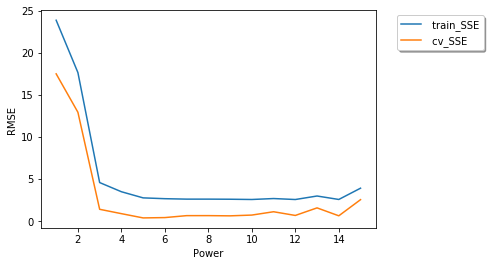


Yacht dataset
when power =  1
Overall Mean Train RMSE: 8.64048240409
Overall Mean Test RMSE: 8.78995553025
when power =  2
Overall Mean Train RMSE: 4.10598483343
Overall Mean Test RMSE: 4.2608975793
when power =  3
Overall Mean Train RMSE: 1.8184166692
Overall Mean Test RMSE: 1.92782755197
when power =  4
Overall Mean Train RMSE: 1.47500864518
Overall Mean Test RMSE: 1.53698358468
when power =  5
Overall Mean Train RMSE: 6.26186669055
Overall Mean Test RMSE: 6.23531128257
when power =  6
Overall Mean Train RMSE: 1.78589882868
Overall Mean Test RMSE: 1.86640774353
when power =  7
Overall Mean Train RMSE: 5.50307313684
Overall Mean Test RMSE: 6.18649966287


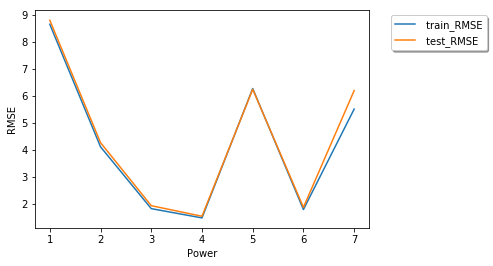

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from csv import reader
from sklearn.preprocessing import StandardScaler
from random import randrange
import operator
%matplotlib inline  

def linear_grad_func(theta, x, y):
    # compute gradient
    grad = np.dot((linear_val_func(theta, x) - y).T, np.c_[np.ones(x.shape[0]), x])
    grad = grad / x.shape[0]

    return grad

def linear_val_func(theta, x):
    # forwarding
    return np.dot(np.c_[np.ones(x.shape[0]), x], theta)


def linear_cost_func(theta, x, y):
    # compute cost (loss)
    y_hat = linear_val_func(theta, x)
    cost = np.mean((y_hat-y)**2)
    return cost


def linear_grad_desc(theta, X_train, Y_train, lr, max_iter, tolerance):
    cost_iter = []
    cost = linear_cost_func(theta, X_train, Y_train)
    RMSE_iter = []
    RMSE_iter.append(np.sqrt(np.sum((linear_val_func(theta, X_train) - Y_train)**2) / Y_train.shape[0]))
    cost_change = 1
    i = 1

    while cost_change > tolerance and i < max_iter:
        pre_cost = cost
        # compute gradient
        grad = linear_grad_func(theta, X_train, Y_train)
        
        # update gradient
        theta = theta - lr * grad

        # compute loss
        cost = linear_cost_func(theta, X_train, Y_train)
        RMSE_iter.append(np.sqrt(np.sum((linear_val_func(theta, X_train) - Y_train)**2) / Y_train.shape[0]))
        cost_change = abs(cost - pre_cost)
        i += 1

    return theta, RMSE_iter

def load_dataset(filename):
    '''Loads an example of market basket transactions from a provided csv file.

    Returns: A list (database) of lists (transactions). Each element of a transaction is
    an item.
    '''
    with open(filename, 'r') as dest_f:
        data_iter = reader(dest_f, delimiter=',', quotechar='"')
        data = [data for data in data_iter]
        data_array = np.asarray(data)
    dataset = data_array.astype(float)
    return dataset

def transform_dataset(dataset, power):
    X = dataset[:, : -1]
    y = dataset[:, -1]
    y = y[:, None]
    for c in range(X.shape[1]):
        feature = X[:, c]
        feature = feature[:, None]
        for p in range(2, power + 1):
            new_feature = np.power(feature, p)
            X = np.hstack((X, new_feature))
    dataset = np.hstack((X, y))
    return dataset
    
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

def linear_regression(dataset, n_folds, lr, max_iter, tolerance):
    # split dataset into training and testing
    dataset_split = cross_validation_split(dataset, n_folds)
    RMSE_train = []
    RMSE_test = []
    SSE_train = []
    SSE_test = []
    
    for i in range(n_folds):
        test = np.array(dataset_split[i])
        train = list(dataset_split)
        train.pop(i)
        train = np.array(reduce(operator.add, train))
        
        # Normalize X_Train
        X_train = train[:, :-1]
        scaler = StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        
        #Get the mean and std to normalize the test dataset
        X_test = test[:, :-1]
        X_test = scaler.transform(X_test)
        
        Y_train = train[:, -1]
        Y_test = test[:,-1]
        
        Y_train = Y_train[:, None]
        Y_test = Y_test[:, None]

        # Linear regression
        #  Initialize the weights for the gradient descent algorithm to all zeros
        #theta = np.zeros((1, X_train.shape[1] + 1))
        theta = np.random.rand(1, X_train.shape[1] + 1)
        fitted_theta, RMSE_iter = linear_grad_desc(theta, X_train, Y_train, lr, max_iter, tolerance)
        
        # 
        if i == 0:
            plt.figure()
            plt.plot(range(len(RMSE_iter)), RMSE_iter) 
            plt.xlabel('Iteration')
            plt.ylabel('RMSE')
        
        RMSE_test.append(np.sqrt(np.sum((linear_val_func(fitted_theta, X_test) - Y_test)**2) / Y_test.shape[0]))
        RMSE_train.append(np.sqrt(np.sum((linear_val_func(fitted_theta, X_train) - Y_train)**2) / Y_train.shape[0]))
        SSE_test.append(np.sum((linear_val_func(fitted_theta, X_test) - Y_test)**2))
        SSE_train.append(np.sum((linear_val_func(fitted_theta, X_train) - Y_train)**2))
        print('Train RMSE: {}'.format(RMSE_train[i]))
        print('Test RMSE: {}'.format(RMSE_test[i]))
    print('Overall Mean Train RMSE: {}'.format(np.sum(RMSE_train)*1./len(RMSE_train)))
    print('Overall Mean Test RMSE: {}'.format(np.sum(RMSE_test)*1. / len(RMSE_test)))
    print('Overall Mean Train SSE: {}'.format(np.sum(SSE_train)*1./len(SSE_train)))
    print('Overall Mean Test SSE: {}'.format(np.sum(SSE_test)*1. / len(SSE_test)))
    print('std of train SSE: {}'.format(np.std(np.array(SSE_train), axis=0)))
    print('std of test SSE: {}'.format(np.std(np.array(SSE_test), axis=0)))
    
    plt.plot(RMSE_train, label = " train_RMSE")
    plt.plot(RMSE_test, label = " test_RMSE")
    plt.show()
    
    
def normal_equation(X, y):
    # add bias to x
    X_b = np.c_[np.ones(X.shape[0]), X]
    return np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

def normal_equation_eval(dataset, n_folds):
    dataset_split = cross_validation_split(dataset, n_folds)
    RMSE_train = []
    RMSE_test = []
    SSE_train = []
    SSE_test = []
    
    for i in range(n_folds):
        test = np.array(dataset_split[i])
        train = list(dataset_split)
        train.pop(i)
        train = np.array(reduce(operator.add, train))
        
        # Normalize X_Train
        X_train = train[:, :-1]
        scaler = StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        
        #Get the mean and std to normalize the test dataset
        X_test = test[:, :-1]
        X_test = scaler.transform(X_test)
        
        Y_train = train[:, -1]
        Y_test = test[:,-1]
        
        Y_train = Y_train[:, None]
        Y_test = Y_test[:, None]

        # Linear regression
        #  Initialize the weights for the gradient descent algorithm to all zeros
        fitted_theta = normal_equation(X_train, Y_train)
        
        RMSE_test.append(np.sqrt(np.sum((linear_val_func(fitted_theta, X_test) - Y_test)**2) / Y_test.shape[0]))
        RMSE_train.append(np.sqrt(np.sum((linear_val_func(fitted_theta, X_train) -  Y_train)**2) / Y_train.shape[0]))
        SSE_test.append(np.sum((linear_val_func(fitted_theta, X_test) - Y_test)**2))
        SSE_train.append(np.sum((linear_val_func(fitted_theta, X_train) - Y_train)**2))
#         print('Train RMSE: {}'.format(RMSE_train[i]))
#         print('Test RMSE: {}'.format(RMSE_test[i]))
    train_RMSE = np.sum(RMSE_train)*1./len(RMSE_train)
    test_RMSE = np.sum(RMSE_test)*1. / len(RMSE_test)
    print('Overall Mean Train RMSE: {}'.format(train_RMSE))
    print('Overall Mean Test RMSE: {}'.format(test_RMSE))
    return train_RMSE, test_RMSE


def normal_equation_for_sinData(train_set, cv_set):
    # Normalize X_Train
    X_train = train_set[:, :-1]
    Y_train = train_set[:, -1]
    Y_train = Y_train[:, None]

    X_cv = cv_set[:, :-1]
    Y_cv = cv_set[:, -1]
    Y_cv = Y_cv[:, None]
    
    fitted_theta = normal_equation(X_train, Y_train)
    
    RMSE_cv = np.sqrt(np.sum((linear_val_func(fitted_theta, X_cv) - Y_cv)**2) / Y_cv.shape[0])
    RMSE_train = np.sqrt(np.sum((linear_val_func(fitted_theta, X_train) -  Y_train)**2) / Y_train.shape[0])
    SSE_cv = np.sum((linear_val_func(fitted_theta, X_cv) - Y_cv)**2)
    SSE_train = np.sum((linear_val_func(fitted_theta, X_train) - Y_train)**2) 

    #print('Train RMSE: {}'.format(RMSE_train))
    print('Cross validation RMSE: {}'.format(RMSE_cv))
    # return SSE for both training and cv dataset
    return SSE_train / 100.0, SSE_cv / 50.0, RMSE_cv
   

def main():
    average_train_SSE =[]
    average_test_SSE = []
    average_cv_RMSE = []
    powers = range(1, 16)
    print('Sindata dataset')
    for i in powers:
        train_set = load_dataset("sinData_Train.csv")
        train_set = transform_dataset(train_set, i)
        cv_set = load_dataset("sinData_Validation.csv")
        cv_set = transform_dataset(cv_set, i)
        
        print "when power = ", i
        train_SSE, test_SSE, RMSE_cv = normal_equation_for_sinData(train_set, cv_set)
        average_train_SSE.append(train_SSE)
        average_test_SSE.append(test_SSE)
        average_cv_RMSE.append(RMSE_cv)
    plt.plot(np.arange(1, powers[-1] + 1, 1), average_train_SSE, label = " train_SSE")
    plt.plot(np.arange(1, powers[-1] + 1, 1), average_test_SSE, label = " cv_SSE")
    #plt.plot(np.arange(1, powers[-1] + 1, 1), average_cv_RMSE, label = " cv_RMSE")
    plt.xlabel('Power')
    plt.ylabel('RMSE')
    plt.legend(bbox_to_anchor=(1.05,1),loc=2, shadow=True)
    plt.show()
    
    print ""
    
    average_train_RMSE =[]
    average_test_RMSE = []
    powers = range(1, 8)
    print('Yacht dataset')
    for i in powers:
        dataset = load_dataset("yachtData.csv")
        dataset = transform_dataset(dataset, i)
        print "when power = ", i
        train_RMSE, test_RMSE = normal_equation_eval(dataset, n_folds=10)
        average_train_RMSE.append(train_RMSE)
        average_test_RMSE.append(test_RMSE)
    plt.plot(np.arange(1, powers[-1] + 1, 1), average_train_RMSE, label = " train_RMSE")
    plt.plot(np.arange(1, powers[-1] + 1, 1), average_test_RMSE, label = " test_RMSE")
    plt.xlabel('Power')
    plt.ylabel('RMSE')
    plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
    plt.show()
    

if __name__ == "__main__":
    main()